In [1]:
from __future__ import print_function
import numpy as np

from sklearn import datasets, neighbors, linear_model, tree
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from time import time

%matplotlib inline

In [2]:
faces_data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\home\scikit_learn_data


In [3]:
n_samples, height, width = faces_data.images.shape
X = faces_data.data
n_features = X.shape[1]
y = faces_data.target
n_classes = int(max(y)+1)

print("Number of samples: {}, \nHeight of each image: {}, \nWidth of each image: {}, \nNumber of input features: {},\nNumber of output classes: {}\n".format(n_samples,height,
                                        width,n_features,n_classes))

Number of samples: 400, 
Height of each image: 64, 
Width of each image: 64, 
Number of input features: 4096,
Number of output classes: 40



In [4]:
# Split into a training set (85%) and a test set (15%) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

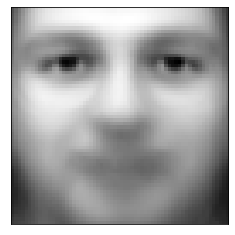

In [5]:
mean_image = np.mean(X_train,axis=0)
plt.figure
plt.imshow(mean_image.reshape((64,64)), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [6]:
def plot_gallery(images, h, w, titles=None, n_row=3, n_col=4):
    """
    Helper function to plot a gallery of portraits
    Taken from: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html
    """
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles != None:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

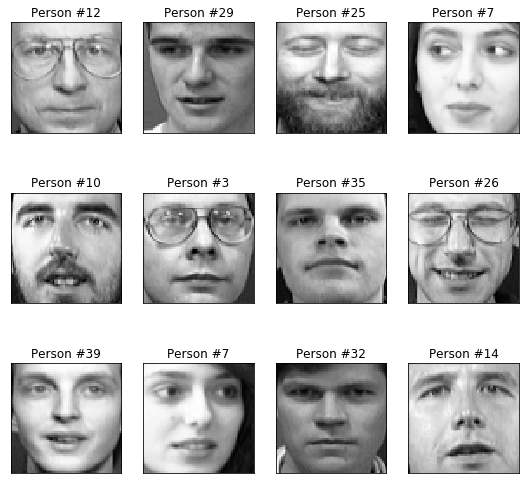

In [7]:
chosen_images = X_train[:12]
chosen_labels = y_train[:12]
titles = ['Person #'+str(i) for i in chosen_labels]

plot_gallery(chosen_images, height, width, titles)

In [19]:
#Reduce the dimensionality of the feature space
n_components = 130

#Finding the top n_components principal components in the data
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

#Find the eigen-vectors of the feature space
eigenfaces = pca.components_.reshape((n_components, height, width))

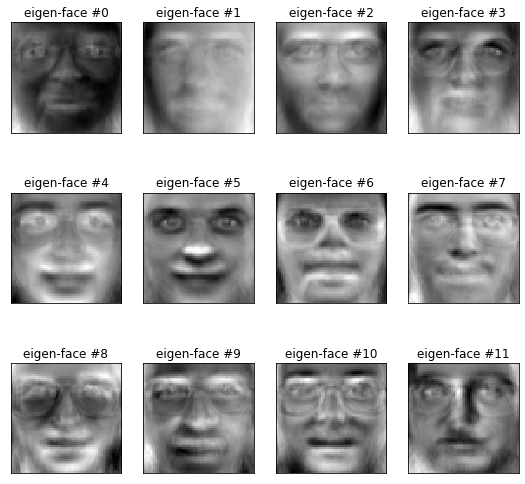

In [20]:
titles = ['eigen-face #'+str(i) for i in range(12)]
plot_gallery(eigenfaces, height, width, titles)

In [21]:
#Projecting the data onto the eigenspace
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Current shape of input data matrix: ", X_train_pca.shape)

Current shape of input data matrix:  (340, 130)


In [22]:
knn_classifier = KNeighborsClassifier(n_neighbors = 2)
knn_classifier.fit(X_train_pca, y_train)

#Detect faces in the test set
y_pred_test = knn_classifier.predict(X_test_pca)
correct_count = 0.0
for i in range(len(y_test)):
    if y_pred_test[i] == y_test[i]:
        correct_count += 1.0
accuracy = correct_count/float(len(y_test))
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test, labels=range(n_classes)))

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         3
           4       0.67      1.00      0.80         2
           5       0.75      1.00      0.86         3
           7       1.00      0.75      0.86         4
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         2
          15       1.00      0.50      0.67         2
          17       0.67      1.00      0.80         2
          18       1.00      1.00      1.00         1
          19

F:\hbdhbds\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\hbdhbds\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


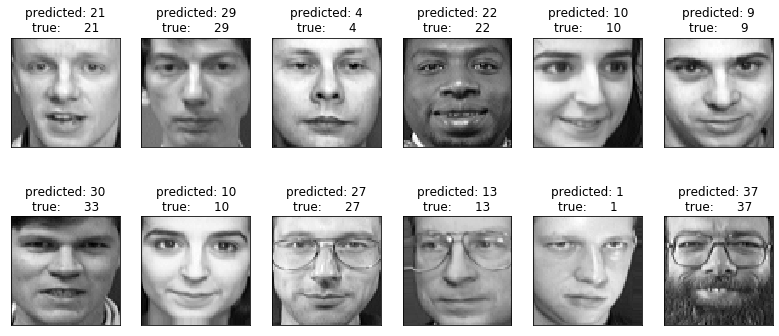

In [23]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
target_names = [str(element) for element in np.arange(40)+1]
prediction_titles = [title(y_pred_test, y_test, target_names, i) for i in range(y_pred_test.shape[0])]
plot_gallery(X_test, height, width, prediction_titles, n_row=2, n_col=6)
plt.show()

In [25]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set y_pred = gnb.predict(X_test)
y_pred =gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)

from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

#training the model on training set

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

#making predictions on the testing set
y_pred = gnb.predict(X_test)

#comparing actual response values (y_test) with predicted response values (y_pred) From sklearn mport metrics

print ("Gaussian Naive Bayes model accuracy (in %):" , metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 62.5
Gaussian Naive Bayes model accuracy (in %): 62.5
